In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### csv_read

In [2]:
card_01 = pd.read_csv("card_202001.csv")
card_02 = pd.read_csv("card_202002.csv")
card_03 = pd.read_csv("card_202003.csv")
card_04 = pd.read_csv("card_202004.csv")
card_05 = pd.read_csv("card_202005.csv")
card_06 = pd.read_csv("card_202006.csv")

card_01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230.0
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550.0
2,20200104,1174066000,성내3동,7021,한의원,53,4589800.0
3,20200104,1174066000,성내3동,7020,의원,339,9267240.0
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000.0


In [3]:
adstrd=pd.read_csv('adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)
adstrd_name_seoul = adstrd_name[0:25]
adstrd_name_seoul

,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


#### 1월 데이터 가공

In [4]:
adstrd_code_01 = card_01['adstrd_code']
mrhst_induty_cl_code_01 = card_01['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_01:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_01:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card01 = {"receipt_dttm" : card_01['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_01['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_01['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_01['selng_cascnt'], "salamt" : card_01['salamt']}

df_card01 = pd.DataFrame(data_card01)
df_card01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,11740,성내3동,70,약국,463,5843230.0
1,20200104,11740,성내3동,70,치과의원,33,7835550.0
2,20200104,11740,성내3동,70,한의원,53,4589800.0
3,20200104,11740,성내3동,70,의원,339,9267240.0
4,20200104,11740,성내3동,61,자동차정비,19,4441000.0


In [5]:
df_card01['mrhst_induty_cl_code'].value_counts()
code = []
for i in df_card01['mrhst_induty_cl_code'].value_counts().index:
    code.append(i)
print(code , '\n')
print(len(code), "\n")
code.sort()
print(code)

[80, 70, 83, 71, 40, 21, 51, 61, 42, 44, 91, 50, 22, 93, 92, 90, 99, 20, 10, 52, 33, 31, 82, 84, 34, 81, 43, 32, 30, 11, 60, 41, 62, 96, 95] 

35 

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


In [6]:
seoul01 = []
seoul01_sum = []

is_code = df_card01['adstrd_code'] == 11140

for i in code:
    is_name = df_card01['mrhst_induty_cl_code'] == i
    seoul = df_card01[is_code & is_name]
    seoul01.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul01_sum.append(sum_num)
    
seoul01[0]
print(seoul01_sum)
print(code)

mean = []

for i in seoul01_sum:
    mean.append(i/28)

Jongrogu01 = pd.DataFrame({'code' : code, 'total_sum' : seoul01_sum, 'mean' : mean})
Jongrogu01

[32392, 8734199, 68283, 27639, 7815, 192, 2856, 32698, 4491, 1425, 5679659, 4210, 113310, 1032, 33338, 23992, 5700, 2688, 361, 70456, 214398, 171114, 49148, 2801479, 2642, 797, 161398, 860, 3160, 1317606, 1159, 2052, 0, 0, 7885]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,32392,1156.857143
1,11,8734199,311935.678571
2,20,68283,2438.678571
3,21,27639,987.107143
4,22,7815,279.107143
5,30,192,6.857143
6,31,2856,102.000000
7,32,32698,1167.785714
8,33,4491,160.392857
9,34,1425,50.892857


### 상대값 = {(n월 평균 - 1월 평균)/(1월 평균)} * 100

### 2월 데이터 가공

In [7]:
adstrd_code_02 = card_02['adstrd_code']
mrhst_induty_cl_code_02 = card_02['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_02:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_02:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card02 = {"receipt_dttm" : card_02['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_02['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_02['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_02['selng_cascnt'], "salamt" : card_02['salamt']}

df_card02 = pd.DataFrame(data_card02)
df_card02.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


#### 2월 상반기

In [8]:
is_date = df_card02['receipt_dttm'] < 20200215
df_card02_1 = df_card02[is_date]
df_card02_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


In [9]:
seoul02_1 = []
seoul02_sum_1 = []

is_code = df_card02_1['adstrd_code'] == 11140

for i in code:
    is_name = df_card02_1['mrhst_induty_cl_code'] == i
    seoul = df_card02_1[is_code & is_name]
    seoul02_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_1.append(sum_num)
    
print(seoul02_sum_1)
print(code)

mean = []

for i in seoul02_sum_1:
    mean.append(i/14)

Jongrogu02_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_1, 'mean' : mean})
Jongrogu02_1

[7853, 1814890, 12041, 9951, 2233, 124, 819, 676, 2931, 553, 1144999, 2739, 14279, 333, 7171, 5116, 3019, 1511, 162, 14411, 13832, 38266, 10846, 575031, 656, 311, 35415, 370, 1053, 59579, 630, 1381, 0, 0, 5185]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,7853,560.928571
1,11,1814890,129635.000000
2,20,12041,860.071429
3,21,9951,710.785714
4,22,2233,159.500000
5,30,124,8.857143
6,31,819,58.500000
7,32,676,48.285714
8,33,2931,209.357143
9,34,553,39.500000


### 1월&2월(상반기) 평균 비교

In [10]:
per_02_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu02_1['mean'][i]
    if(a != 0):
        per_02_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_1.append(-1)
per_02_1

[-51.51271918992344,
 -58.44175293006262,
 -64.73207094005829,
 -27.993053294258115,
 -42.85348688419705,
 29.16666666666668,
 -42.64705882352941,
 -95.86519053153098,
 30.52772211088845,
 -22.385964912280706,
 -59.68071322591726,
 30.118764845605696,
 -74.79657576559879,
 -35.46511627906976,
 -56.98002279680845,
 -57.35245081693898,
 5.929824561403501,
 12.425595238095239,
 -10.249307479224374,
 -59.09219938685136,
 -87.09689456058358,
 -55.27426160337553,
 -55.863921217546995,
 -58.94804137386003,
 -50.34065102195308,
 -21.9573400250941,
 -56.1146978277302,
 -13.953488372093032,
 -33.354430379746844,
 -90.95647712593902,
 8.714408973252796,
 34.60038986354774,
 -1,
 -1,
 31.515535827520612]

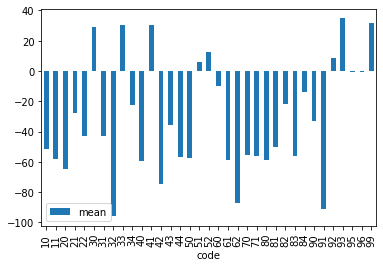

In [11]:
data_02_1 = pd.DataFrame({"code": code, "mean": per_02_1})
data_02_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

#### 2월 하반기

In [12]:
is_date = df_card02['receipt_dttm'] > 20200214
df_card02_2 = df_card02[is_date]
df_card02_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
160531,20200215,11710,거여1동,70,동물병원,13,730100.0
160532,20200215,11680,대치4동,70,약국,442,7531530.0
160533,20200215,11650,서초1동,80,서양음식,1840,19929464.0
160534,20200215,11440,대흥동,71,미 용 원,59,2890700.0
160535,20200215,11260,망우본동,70,약국,394,6041060.0


In [13]:
seoul02_2 = []
seoul02_sum_2 = []

is_code = df_card02_2['adstrd_code'] == 11140

for i in code:
    is_name = df_card02_2['mrhst_induty_cl_code'] == i
    seoul = df_card02_2[is_code & is_name]
    seoul02_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_2.append(sum_num)
    
seoul02_2[0]
print(seoul02_sum_2)
print(code)

mean = []

for i in seoul02_sum_2:
    mean.append(i/15)

Jongrogu02_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_2, 'mean' : mean})
Jongrogu02_2

[19824, 3896761, 25978, 23268, 6051, 300, 1332, 31615, 7085, 1308, 3121213, 6367, 35721, 759, 18531, 15936, 55719, 3055, 402, 34753, 225629, 93104, 24419, 1377909, 1483, 707, 89693, 831, 2789, 818091, 1556, 3516, 0, 0, 6622]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,19824,1321.600000
1,11,3896761,259784.066667
2,20,25978,1731.866667
3,21,23268,1551.200000
4,22,6051,403.400000
5,30,300,20.000000
6,31,1332,88.800000
7,32,31615,2107.666667
8,33,7085,472.333333
9,34,1308,87.200000


### 1월 & 2월(하반기) 평균 비교

In [14]:
per_02_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu02_2['mean'][i]
    if(a != 0):
        per_02_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_2.append(-1)
per_02_2

[14.240553223018019,
 -16.718706928172043,
 -28.98339752695889,
 57.146061724374974,
 44.53230966090852,
 191.66666666666669,
 -12.941176470588239,
 80.48402552653577,
 194.4852668299562,
 71.34035087719298,
 2.5812336034023624,
 182.3056215360253,
 -41.15329626687847,
 37.28682170542637,
 3.759073729677856,
 23.98799599866623,
 1724.715789473684,
 112.15277777777777,
 107.86703601108034,
 -7.925135309034473,
 96.44499171323115,
 1.5662852445348399,
 -7.255364748650328,
 -8.18789646468883,
 4.7792076709563345,
 65.58762024257632,
 3.735444883662348,
 80.37209302325581,
 64.75105485232068,
 15.899836521691613,
 150.6068449813057,
 219.84405458089665,
 -1,
 -1,
 56.76685690128937]

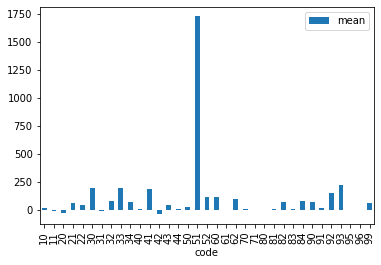

In [15]:
data_02_2 = pd.DataFrame({"code": code, "mean": per_02_2})
data_02_2.plot(x = "code", y = "mean", kind = 'bar')

### 3월 데이터 가공

In [16]:
adstrd_code_03 = card_03['adstrd_code']
mrhst_induty_cl_code_03 = card_03['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_03:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_03:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card03 = {"receipt_dttm" : card_03['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_03['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_03['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_03['selng_cascnt'], "salamt" : card_03['salamt']}

df_card03 = pd.DataFrame(data_card03)
df_card03.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200301,11545,시흥4동,90,조명 기구,1,15000.0
1,20200301,11140,광희동,80,일반한식,952,25644550.0
2,20200301,11710,잠실본동,71,미 용 원,121,6493950.0
3,20200301,11620,서림동,83,정 육 점,50,1273200.0
4,20200301,11740,둔촌2동,71,미 용 원,47,1636300.0


### 3월 상반기

In [17]:
is_date = df_card03['receipt_dttm'] < 20200316
df_card03_1 = df_card03[is_date]
df_card03_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200301,11545,시흥4동,90,조명 기구,1,15000.0
1,20200301,11140,광희동,80,일반한식,952,25644550.0
2,20200301,11710,잠실본동,71,미 용 원,121,6493950.0
3,20200301,11620,서림동,83,정 육 점,50,1273200.0
4,20200301,11740,둔촌2동,71,미 용 원,47,1636300.0


In [18]:
seoul03_1 = []
seoul03_sum_1 = []

is_code = df_card03_1['adstrd_code'] == 11140

for i in code:
    is_name = df_card03_1['mrhst_induty_cl_code'] == i
    seoul = df_card03_1[is_code & is_name]
    seoul03_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum_1.append(sum_num)
    
print(seoul03_sum_1)
print(code)

mean = []

for i in seoul03_sum_1:
    mean.append(i/15)

Jongrogu03_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_1, 'mean' : mean})
Jongrogu03_1

[12265, 3068091, 23237, 18842, 3552, 281, 1338, 11899, 6647, 1116, 2684778, 3624, 25332, 706, 15445, 9294, 11497, 2591, 446, 30985, 54658, 91226, 19853, 1200643, 1142, 604, 80079, 606, 2750, 619028, 1530, 2788, 0, 0, 7029]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,12265,817.666667
1,11,3068091,204539.400000
2,20,23237,1549.133333
3,21,18842,1256.133333
4,22,3552,236.800000
5,30,281,18.733333
6,31,1338,89.200000
7,32,11899,793.266667
8,33,6647,443.133333
9,34,1116,74.400000


### 1월 & 3월 (상반기) 평균 비교

In [19]:
per_03_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu03_1['mean'][i]
    if(a != 0):
        per_03_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_1.append(-1)
per_03_1


[-29.319996707005853,
 -34.42898198220581,
 -36.47652661228515,
 27.254000988940753,
 -15.158029430582202,
 173.19444444444446,
 -12.549019607843134,
 -32.07087079739841,
 176.27996734209162,
 46.18947368421053,
 -11.762561801685626,
 60.684085510688824,
 -58.26811402347543,
 27.700258397932835,
 -13.520107184994092,
 -27.68922974324775,
 276.50994152046786,
 79.93055555555554,
 130.61865189289014,
 -17.908103402596424,
 -52.41174513443843,
 -0.48240743987438145,
 -24.597270828246657,
 -19.99939079797969,
 -19.313651274287153,
 41.4638226683396,
 -7.383734618768497,
 31.534883720930225,
 62.447257383966246,
 -12.30163392293802,
 146.41932700603968,
 153.61923326835608,
 -1,
 -1,
 66.40202916930885]

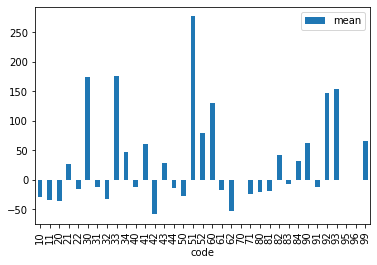

In [20]:
data_03_1 = pd.DataFrame({"code": code, "mean": per_03_1})
data_03_1.plot(x = "code", y = "mean", kind = 'bar')

### 3월 하반기

In [21]:
is_date = df_card03['receipt_dttm'] > 20200315
df_card03_2 = df_card03[is_date]
df_card03_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
376104,20200316,11290,삼선동,10,기타숙박업,12,528000.0
376105,20200316,11680,역삼1동,80,서양음식,5424,70725305.0
376106,20200316,11440,서교동,80,일반한식,4441,131872050.0
376107,20200316,11740,명일2동,40,편 의 점,404,2209050.0
376108,20200316,11380,갈현1동,71,미 용 원,37,1616800.0


In [22]:
seoul03_2 = []
seoul03_sum_2 = []

is_code = df_card03_2['adstrd_code'] == 11140

for i in code:
    is_name = df_card03_2['mrhst_induty_cl_code'] == i
    seoul = df_card03_2[is_code & is_name]
    seoul03_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum_2.append(sum_num)
    
seoul03_2[0]
print(seoul03_sum_2)
print(code)

mean = []

for i in seoul03_sum_2:
    mean.append(i/16)

Jongrogu03_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_2, 'mean' : mean})
Jongrogu03_2

[13599, 3957610, 30547, 18028, 3622, 308, 1498, 32669, 6975, 1355, 2816115, 4737, 39801, 786, 15782, 14980, 50166, 3719, 491, 35128, 226647, 108904, 20984, 1375690, 1019, 535, 86726, 608, 2703, 820592, 1797, 3088, 0, 0, 5451]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,13599,849.9375
1,11,3957610,247350.6250
2,20,30547,1909.1875
3,21,18028,1126.7500
4,22,3622,226.3750
5,30,308,19.2500
6,31,1498,93.6250
7,32,32669,2041.8125
8,33,6975,435.9375
9,34,1355,84.6875


### 1월 & 3월(하반기) 평균 비교

In [23]:
per_03_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu03_2['mean'][i]
    if(a != 0):
        per_03_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_2.append(-1)
per_03_2

[-26.530470486539887,
 -20.704606112134613,
 -21.712212410116724,
 14.146676797279204,
 -18.893154190658983,
 180.72916666666669,
 -8.21078431372549,
 74.84479173038108,
 171.79358717434872,
 66.40350877192982,
 -13.230684271714201,
 96.90617577197149,
 -38.52991792427853,
 33.28488372093024,
 -17.15609814625952,
 9.265588529509833,
 1440.1842105263158,
 142.12239583333331,
 138.01939058171746,
 -12.748381968888381,
 84.99811098984132,
 11.377210514627683,
 -25.282819239846987,
 -14.064767217601851,
 -32.503785011355035,
 17.471769134253446,
 -5.965067720789595,
 23.720930232558135,
 49.691455696202524,
 8.988271152377868,
 171.3330457290768,
 163.35282651072123,
 -1,
 -1,
 20.979708306911867]

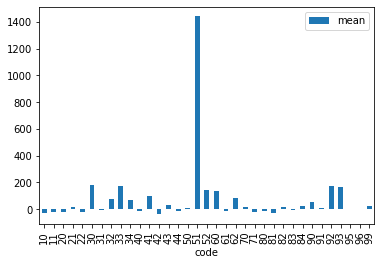

In [24]:
data_03_2 = pd.DataFrame({"code": code, "mean": per_03_2})
data_03_2.plot(x = "code", y = "mean", kind = 'bar')

### 4월 데이터 가공

In [25]:
adstrd_code_04 = card_04['adstrd_code']
mrhst_induty_cl_code_04 = card_04['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_04:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_04:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card04 = {"receipt_dttm" : card_04['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_04['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_04['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_04['selng_cascnt'], "salamt" : card_04['salamt']}

df_card04 = pd.DataFrame(data_card04)
df_card04.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200401,11530,구로5동,92,가정용품수리,43,3458100.0
1,20200401,11680,신사동,42,스포츠의류,1,516800.0
2,20200401,11710,오금동,44,기타잡화,1,85000.0
3,20200401,11620,난향동,21,기타레져업,19,95300.0
4,20200401,11710,가락2동,70,제약회사,7,6700000.0


#### 4월 상반기

In [26]:
is_date = df_card04['receipt_dttm'] < 20200416
df_card04_1 = df_card04[is_date]
df_card04_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200401,11530,구로5동,92,가정용품수리,43,3458100.0
1,20200401,11680,신사동,42,스포츠의류,1,516800.0
2,20200401,11710,오금동,44,기타잡화,1,85000.0
3,20200401,11620,난향동,21,기타레져업,19,95300.0
4,20200401,11710,가락2동,70,제약회사,7,6700000.0


In [27]:
seoul04_1 = []
seoul04_sum_1 = []

is_code = df_card04_1['adstrd_code'] == 11140

for i in code:
    is_name = df_card04_1['mrhst_induty_cl_code'] == i
    seoul = df_card04_1[is_code & is_name]
    seoul04_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum_1.append(sum_num)
    
print(seoul04_sum_1)
print(code)

mean = []

for i in seoul04_sum_1:
    mean.append(i/15)

Jongrogu04_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_1, 'mean' : mean})
Jongrogu04_1

[11626, 3374789, 31174, 17014, 3634, 300, 1935, 12051, 6710, 1371, 2850397, 3924, 41803, 772, 16251, 10779, 14065, 2765, 535, 36206, 59764, 110084, 19706, 1345683, 646, 330, 88007, 602, 2745, 629261, 1747, 2998, 0, 0, 7839]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,11626,775.066667
1,11,3374789,224985.933333
2,20,31174,2078.266667
3,21,17014,1134.266667
4,22,3634,242.266667
5,30,300,20.000000
6,31,1935,129.000000
7,32,12051,803.400000
8,33,6710,447.333333
9,34,1371,91.400000


### 1월&4월(상반기) 평균 비교

In [28]:
per_04_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu04_1['mean'][i]
    if(a != 0):
        per_04_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_1.append(-1)
per_04_1

[-33.002387420762325,
 -27.874254601557247,
 -14.77898354397629,
 14.90816117322141,
 -13.199402857752174,
 191.66666666666669,
 26.47058823529412,
 -31.20313169001162,
 178.89853781637345,
 79.59298245614035,
 -6.319357083468096,
 73.98574821852732,
 -31.133821669167176,
 39.638242894056866,
 -9.007139000539913,
 -16.135378459486496,
 360.6081871345029,
 92.0138888888889,
 176.63896583564173,
 -4.075545967223048,
 -47.96618127656663,
 20.08960887673326,
 -25.155584493095677,
 -10.33516224822675,
 -54.35780974009589,
 -22.71016311166876,
 1.7854826784305513,
 30.666666666666657,
 62.151898734177216,
 -10.85191374862188,
 181.36899626114467,
 172.722547108512,
 -1,
 -1,
 85.57767913760307]

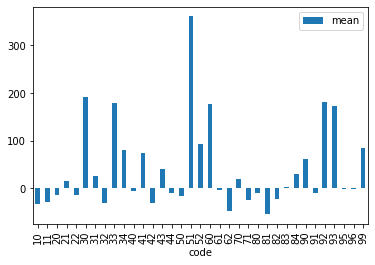

In [29]:
data_04_1 = pd.DataFrame({"code": code, "mean": per_04_1})
data_04_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

## 4월(하반기) 데이터 가공

In [30]:
is_date = df_card04['receipt_dttm'] > 20200415
df_card04_2 = df_card04[is_date]
df_card04_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
385832,20200416,11710,마천2동,80,일식회집,10,516000.0
385833,20200416,11590,사당1동,44,악세 사리,30,451450.0
385834,20200416,11710,잠실2동,80,일반한식,153,1770930.0
385835,20200416,11170,남영동,70,한의원,8,252000.0
385836,20200416,11680,압구정동,70,의원,169,67386370.0


In [31]:
seoul04_2 = []
seoul04_sum_2 = []

is_code = df_card04_2['adstrd_code'] == 11140

for i in code:
    is_name = df_card04_2['mrhst_induty_cl_code'] == i
    seoul = df_card04_2[is_code & is_name]
    seoul04_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum_2.append(sum_num)
    
seoul04_2[0]
print(seoul04_sum_2)
print(code)

mean = []

for i in seoul04_sum_2:
    mean.append(i/15)

Jongrogu04_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_2, 'mean' : mean})
Jongrogu04_2

[13557, 3860988, 34168, 17321, 3838, 355, 2058, 32931, 6810, 1250, 3183858, 4079, 48204, 887, 17381, 15039, 53113, 3429, 466, 37032, 230402, 103401, 20882, 1384336, 930, 374, 87648, 678, 2868, 817717, 1748, 3108, 0, 0, 5623]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,13557,903.800000
1,11,3860988,257399.200000
2,20,34168,2277.866667
3,21,17321,1154.733333
4,22,3838,255.866667
5,30,355,23.666667
6,31,2058,137.200000
7,32,32931,2195.400000
8,33,6810,454.000000
9,34,1250,83.333333


In [32]:
per_04_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu04_2['mean'][i]
    if(a != 0):
        per_04_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_2.append(-1)
per_04_2

[-21.87453692269697,
 -17.48324488599355,
 -6.5942230618650814,
 16.981559873126137,
 -8.326722115589668,
 245.1388888888889,
 34.50980392156862,
 87.99681937733197,
 183.05499888666225,
 63.74269005847951,
 4.640113077211153,
 80.85827395091053,
 -20.588827111464127,
 60.43927648578813,
 -2.680024796528482,
 17.00900300100033,
 1639.3730994152047,
 138.125,
 140.96029547553096,
 -1.8871352333371085,
 100.60062749341567,
 12.799186507240787,
 -20.689075174303458,
 -7.759656000752941,
 -34.292202876608634,
 -12.404851526557929,
 1.3702772029393213,
 47.162790697674424,
 69.41772151898734,
 15.846851537308314,
 181.53005464480873,
 182.72904483430796,
 -1,
 -1,
 33.11688860705983]

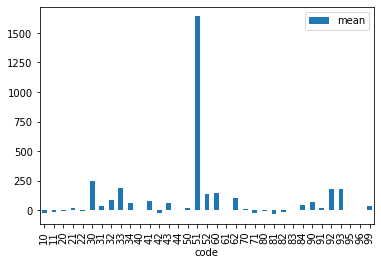

In [33]:
data_04_2 = pd.DataFrame({"code": code, "mean": per_04_2})
data_04_2.plot(x = "code", y = "mean", kind = 'bar')

### 5월 데이터 가공

In [34]:
adstrd_code_05 = card_05['adstrd_code']
mrhst_induty_cl_code_05 = card_05['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_05:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_05:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card05 = {"receipt_dttm" : card_05['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_05['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_05['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_05['selng_cascnt'], "salamt" : card_05['salamt']}

df_card05 = pd.DataFrame(data_card05)
df_card05.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200501,11500,화곡2동,83,정 육 점,17.0,481200.0
1,20200501,11215,자양1동,80,스넥,188.0,2777400.0
2,20200501,11560,문래동,61,주 차 장,63.0,375000.0
3,20200501,11620,신사동,80,서양음식,406.0,3421500.0
4,20200501,11200,성수1가2동,61,주 차 장,37.0,259500.0


### 5월 상반기

In [35]:
is_date = df_card05['receipt_dttm'] < 20200516
df_card05_1 = df_card05[is_date]
df_card05_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200501,11500,화곡2동,83,정 육 점,17.0,481200.0
1,20200501,11215,자양1동,80,스넥,188.0,2777400.0
2,20200501,11560,문래동,61,주 차 장,63.0,375000.0
3,20200501,11620,신사동,80,서양음식,406.0,3421500.0
4,20200501,11200,성수1가2동,61,주 차 장,37.0,259500.0


In [36]:
seoul05_1 = []
seoul05_sum_1 = []

is_code = df_card05_1['adstrd_code'] == 11140

for i in code:
    is_name = df_card05_1['mrhst_induty_cl_code'] == i
    seoul = df_card05_1[is_code & is_name]
    seoul05_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum_1.append(sum_num)
    
print(seoul05_sum_1)
print(code)

mean = []

for i in seoul05_sum_1:
    mean.append(i/15)

Jongrogu05_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_1, 'mean' : mean})
Jongrogu05_1

[24968, 1334498, 39929, 57995, 32618, 322907, 7524, 13258, 9190, 10567, 940057, 2421, 102965, 20544, 76515, 59865, 27924, 14765, 2566, 35834, 16737, 108070, 867014, 1070037, 5214, 15494, 108016, 5193, 20024, 76784, 15609, 18695, 0, 0, 24959]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,24968,1664.533333
1,11,1334498,88966.533333
2,20,39929,2661.933333
3,21,57995,3866.333333
4,22,32618,2174.533333
5,30,322907,21527.133333
6,31,7524,501.600000
7,32,13258,883.866667
8,33,9190,612.666667
9,34,10567,704.466667


### 1월&5월(상반기) 평균 비교

In [37]:
per_05_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu05_1['mean'][i]
    if(a != 0):
        per_05_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_1.append(-1)
per_05_1

[43.88408660574627,
 -71.47920566804886,
 9.154743249906025,
 291.6832495145748,
 679.103433567925,
 313837.3611111112,
 391.764705882353,
 -24.312598120170446,
 281.9787723595339,
 1284.2152046783626,
 -69.10425314853116,
 7.344418052256533,
 69.62433442179272,
 3615.9689922480616,
 328.4240206371108,
 365.7719239746582,
 814.4701754385962,
 925.3472222222223,
 1226.8328716528163,
 -5.061125619772146,
 -85.42784914038377,
 17.892555060758728,
 3192.9643796966984,
 -28.70186069572537,
 268.3875851627555,
 3528.8749477206197,
 24.927115990697953,
 1027.1627906976744,
 1082.8523206751054,
 -89.12192769816369,
 2413.960310612597,
 1600.649772579597,
 -1,
 -1,
 490.87042908476013]

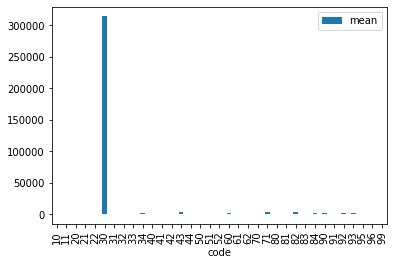

In [38]:
data_05_1 = pd.DataFrame({"code": code, "mean": per_05_1})
data_05_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

## 5월(하반기) 데이터 가공

In [39]:
is_date = df_card05['receipt_dttm'] > 20200515
df_card05_2 = df_card05[is_date]
df_card05_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
389400,20200516,11680,삼성1동,21,스크린골프,462.0,422000.0
389401,20200516,11650,방배4동,83,미곡상,4949.0,190000.0
389402,20200516,11650,서초4동,21,당구장,276.0,188800.0
389403,20200516,11500,가양1동,40,편 의 점,33.0,30976350.0
389404,20200516,11140,소공동,80,스넥,835.0,5590800.0


In [40]:
seoul05_2 = []
seoul05_sum_2 = []

is_code = df_card05_2['adstrd_code'] == 11140

for i in code:
    is_name = df_card05_2['mrhst_induty_cl_code'] == i
    seoul = df_card05_2[is_code & is_name]
    seoul05_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum_2.append(sum_num)
    
seoul05_2[0]
print(seoul05_sum_2)
print(code)

mean = []

for i in seoul05_sum_2:
    mean.append(i/16)

Jongrogu05_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_2, 'mean' : mean})
Jongrogu05_2

[25164, 9932, 22973, 130167, 33810, 9433, 12946, 19546, 10768, 13921, 150505, 2892, 123586, 16597, 92502, 48307, 48365, 669547, 7264, 34050, 6352, 116720, 360427, 652051, 839, 20025, 151197, 8676, 42978, 65663, 24889, 24475, 0, 0, 26002]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,25164,1572.7500
1,11,9932,620.7500
2,20,22973,1435.8125
3,21,130167,8135.4375
4,22,33810,2113.1250
5,30,9433,589.5625
6,31,12946,809.1250
7,32,19546,1221.6250
8,33,10768,673.0000
9,34,13921,870.0625


In [41]:
per_05_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu05_2['mean'][i]
    if(a != 0):
        per_05_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_2.append(-1)
per_05_2

[35.95023462583353,
 -99.80100064127231,
 -41.123339630654776,
 724.1696515792901,
 657.101727447217,
 8497.786458333332,
 693.2598039215686,
 4.6103737231635025,
 319.5947450456469,
 1609.5964912280704,
 -95.36268374562627,
 20.213776722090255,
 90.87062042185156,
 2714.4137596899227,
 385.5675205471234,
 252.3559936645548,
 1384.890350877193,
 43490.29947916667,
 3421.329639889196,
 -15.425939593505165,
 -94.81525014225879,
 19.370711923045462,
 1183.3630056156915,
 -59.26832755126846,
 -44.42657077971234,
 4296.957340025094,
 63.93929912390489,
 1665.4651162790697,
 2280.110759493671,
 -91.2788610555811,
 3658.0457290767904,
 1987.2928849902532,
 -1,
 -1,
 477.0894102726697]

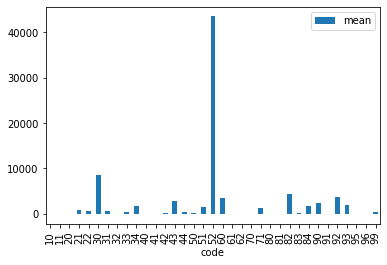

In [42]:
data_05_2 = pd.DataFrame({"code": code, "mean": per_05_2})
data_05_2.plot(x = "code", y = "mean", kind = 'bar')

### 6월 데이터 가공

In [43]:
adstrd_code_06 = card_06['adstrd_code']
mrhst_induty_cl_code_06 = card_06['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_06:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_06:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card06 = {"receipt_dttm" : card_06['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_06['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_06['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_06['selng_cascnt'], "salamt" : card_06['salamt']}

df_card06 = pd.DataFrame(data_card06)
df_card06.head() # 6월은 14알 까지로, 상반기까지만 존재

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200601,11560,대림2동,80,주점,74,5471100
1,20200601,11200,성수2가1동,80,일반한식,429,11876060
2,20200601,11560,신길1동,90,기타건축자재,3,59800
3,20200601,11680,일원본동,40,슈퍼 마켓,145,2293030
4,20200601,11560,양평2동,71,사우나,12,102500


### 6월 상반기 (14일까지)

In [44]:
seoul06 = []
seoul06_sum = []

is_code = df_card06['adstrd_code'] == 11140

for i in code:
    is_name = df_card06['mrhst_induty_cl_code'] == i
    seoul = df_card06[is_code & is_name]
    seoul06.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul06_sum.append(sum_num)
    
print(seoul06_sum)
print(code)

mean = []

for i in seoul06_sum:
    mean.append(i/15)

Jongrogu06 = pd.DataFrame({'code' : code, 'total_sum' : seoul06_sum, 'mean' : mean})
Jongrogu06

[15736, 3960387, 47416, 15823, 3814, 362, 2284, 12789, 7100, 1443, 2966907, 5643, 70485, 1250, 19556, 11417, 12067, 2668, 505, 37971, 56004, 95660, 22698, 1445053, 16, 508, 87668, 667, 2913, 630374, 1922, 2029, 0, 0, 8374]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,15736,1049.066667
1,11,3960387,264025.800000
2,20,47416,3161.066667
3,21,15823,1054.866667
4,22,3814,254.266667
5,30,362,24.133333
6,31,2284,152.266667
7,32,12789,852.600000
8,33,7100,473.333333
9,34,1443,96.200000


### 1월&6월(상반기) 평균 비교

In [45]:
per_06 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu06['mean'][i]
    if(a != 0):
        per_06.append( ( ( b - a ) / a ) * 100 )
    else:
        per_06.append(-1)
per_06

[-9.317526961389651,
 -15.358896677302642,
 29.62211189705587,
 6.864454816262031,
 -8.899978673491136,
 251.94444444444443,
 49.281045751634004,
 -26.99002997125206,
 195.1087359904995,
 89.02456140350876,
 -2.490160060665622,
 150.2042755344418,
 16.116847586267763,
 126.0981912144703,
 9.498270242166102,
 -11.171501611648331,
 295.1766081871345,
 85.27777777777779,
 161.1265004616805,
 0.6006585670489445,
 -51.23984365525798,
 4.354601805424066,
 -13.791812484739962,
 -3.713992977756872,
 -98.86954327529651,
 18.979506482643245,
 1.3934084272006817,
 44.775193798449614,
 72.07594936708858,
 -10.694233835203141,
 209.55421340235833,
 84.57439896036388,
 -1,
 -1,
 98.24307757345171]

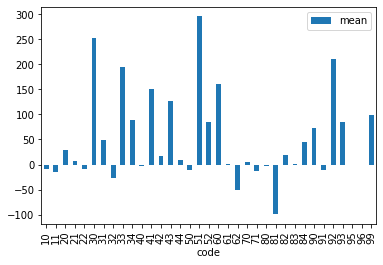

In [46]:
data_06 = pd.DataFrame({"code": code, "mean": per_06})
data_06.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프